In [ ]:
### Header

# 1 - Data preprocessing

In [1]:
import pandas as pd
import numpy as np

### 1.1 - Reading data

In [63]:
data = pd.read_excel("../data/CTG.xls", sheet_name = 2)
data_copy = data.copy() # create checkpoint

In [64]:
data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 - Dropping redundant or useless columns/rows

In [65]:
# We are going to remove some rows that do not contain any information
data.drop(labels = [0, 2127, 2128, 2129], 
          axis = "index", inplace = True)
data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,S8001045.dsp,1998-06-06,CTG2124.txt,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,S8001045.dsp,1998-06-06,CTG2125.txt,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,S8001045.dsp,1998-06-06,CTG2126.txt,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


In [66]:
# We are also removing columns that do not contain information or could bias the analysis
# Specifically, FileName, Date and SegFile could bias the analysis
# b and e are also data about the exam
data.drop(labels = ["FileName", "Date", "SegFile", "b", "e"], 
          axis = "columns", inplace = True)

In [67]:
# While columns A to SUSP are already encoded in CLASS
data.drop(data.loc[:, "A":"SUSP"].columns, 
          axis = "columns", inplace = True)
data

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
5,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5.0,2.0
2123,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5.0,2.0
2124,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,5.0,2.0
2125,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0,2.0


### 1.3 - Dealing with missing values

In [68]:
data.isna().sum()
# The dataset is already devoid of missing values

LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

### 1.4 - Exploring and recoding variable types

In [69]:
data.info()
# All our variables are numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   float64
 1   LB        2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2126 non-null   float64
 4   UC        2126 non-null   float64
 5   ASTV      2126 non-null   float64
 6   MSTV      2126 non-null   float64
 7   ALTV      2126 non-null   float64
 8   MLTV      2126 non-null   float64
 9   DL        2126 non-null   float64
 10  DS        2126 non-null   float64
 11  DP        2126 non-null   float64
 12  DR        2126 non-null   float64
 13  Width     2126 non-null   float64
 14  Min       2126 non-null   float64
 15  Max       2126 non-null   float64
 16  Nmax      2126 non-null   float64
 17  Nzeros    2126 non-null   float64
 18  Mode      2126 non-null   float64
 19  Mean      2126 non-null   float64
 20  Median    2126 non-null   floa

In [70]:
# We will convert CLASS and NSP to categorical variables
data["CLASS"] = data["CLASS"].astype("category").cat.codes
data["NSP"] = data["NSP"].astype("category").cat.codes
data["Tendency"] = data["Tendency"].astype("category").cat.codes
data["Nzeros"] = data["Nzeros"].astype("category").cat.codes

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   float64
 1   LB        2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2126 non-null   float64
 4   UC        2126 non-null   float64
 5   ASTV      2126 non-null   float64
 6   MSTV      2126 non-null   float64
 7   ALTV      2126 non-null   float64
 8   MLTV      2126 non-null   float64
 9   DL        2126 non-null   float64
 10  DS        2126 non-null   float64
 11  DP        2126 non-null   float64
 12  DR        2126 non-null   float64
 13  Width     2126 non-null   float64
 14  Min       2126 non-null   float64
 15  Max       2126 non-null   float64
 16  Nmax      2126 non-null   float64
 17  Nzeros    2126 non-null   int8   
 18  Mode      2126 non-null   float64
 19  Mean      2126 non-null   float64
 20  Median    2126 non-null   floa

### 1.5 - Other basic variable checks

In [20]:
# Next, we want to check if our classification categories are balanced.
# This is something we will have to take into account when modeling.
data["NSP"].value_counts()

0    1655
1     295
2     176
Name: NSP, dtype: int64

In [21]:
data["CLASS"].value_counts()

1    579
0    384
5    332
6    252
9    197
7    107
3     81
4     72
8     69
2     53
Name: CLASS, dtype: int64

### 1.6 - Checking variables distributions and possible outliers

In [71]:
data.describe()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,...,164.025400,4.068203,0.321731,137.452023,134.610536,138.090310,18.808090,1.320320,3.509878,0.304327
std,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,...,17.944183,2.949386,0.685286,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,...,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,0.000000,0.000000,0.000000
25%,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,...,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,1.000000,1.000000,0.000000
50%,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,...,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,1.000000,3.000000,0.000000
75%,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,...,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,2.000000,6.000000,0.000000
max,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,...,238.000000,18.000000,8.000000,187.000000,182.000000,186.000000,269.000000,2.000000,9.000000,2.000000


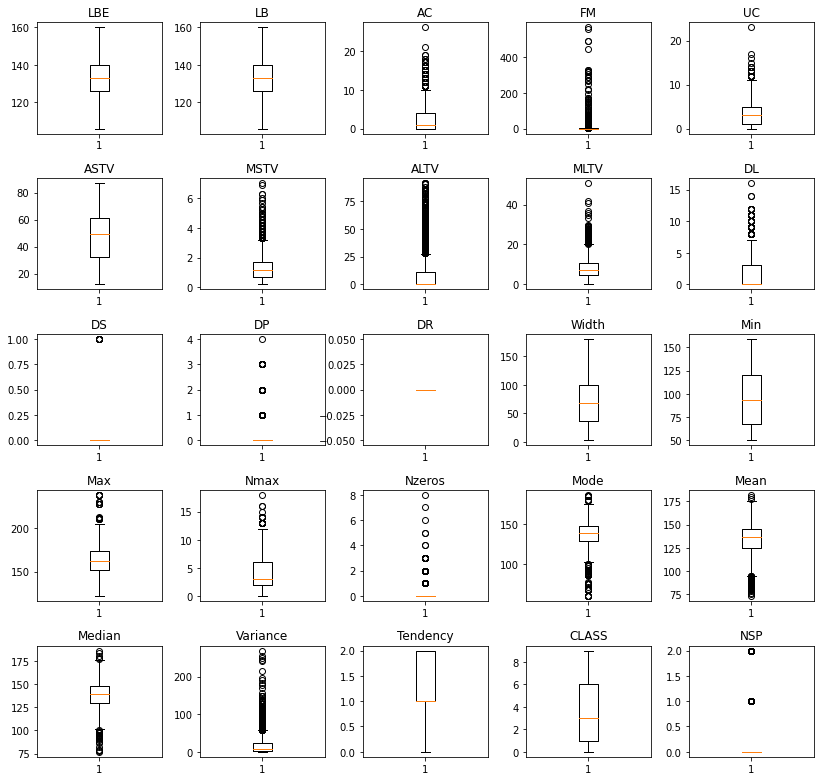

In [72]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
n = 0

for i in np.arange(5):
    for j in np.arange(5):
        plotting_var = data.columns.tolist()[n]
        axs[i, j].boxplot(data[plotting_var])
        axs[i, j].set_title(plotting_var)
        n += 1

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
#plt.show()

### 1.7 - Standardizing continuous variables

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   float64
 1   LB        2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2126 non-null   float64
 4   UC        2126 non-null   float64
 5   ASTV      2126 non-null   float64
 6   MSTV      2126 non-null   float64
 7   ALTV      2126 non-null   float64
 8   MLTV      2126 non-null   float64
 9   DL        2126 non-null   float64
 10  DS        2126 non-null   float64
 11  DP        2126 non-null   float64
 12  DR        2126 non-null   float64
 13  Width     2126 non-null   float64
 14  Min       2126 non-null   float64
 15  Max       2126 non-null   float64
 16  Nmax      2126 non-null   float64
 17  Nzeros    2126 non-null   float64
 18  Mode      2126 non-null   float64
 19  Mean      2126 non-null   float64
 20  Median    2126 non-null   floa

In [73]:
# Duplicate the variables to standardise (we want to keep the original values for interpretation & visualisation purposes)
original_variables_to_standardise = data.loc[:, "LBE":"Variance"].columns.tolist()
variables_std = [element + "_std" for element in original_variables_to_standardise]

data[variables_std] = data[original_variables_to_standardise]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LBE           2126 non-null   float64
 1   LB            2126 non-null   float64
 2   AC            2126 non-null   float64
 3   FM            2126 non-null   float64
 4   UC            2126 non-null   float64
 5   ASTV          2126 non-null   float64
 6   MSTV          2126 non-null   float64
 7   ALTV          2126 non-null   float64
 8   MLTV          2126 non-null   float64
 9   DL            2126 non-null   float64
 10  DS            2126 non-null   float64
 11  DP            2126 non-null   float64
 12  DR            2126 non-null   float64
 13  Width         2126 non-null   float64
 14  Min           2126 non-null   float64
 15  Max           2126 non-null   float64
 16  Nmax          2126 non-null   float64
 17  Nzeros        2126 non-null   int8   
 18  Mode          2126 non-null 

In [74]:
# Standardise the variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[variables_std] = scaler.fit_transform(data[variables_std])

22


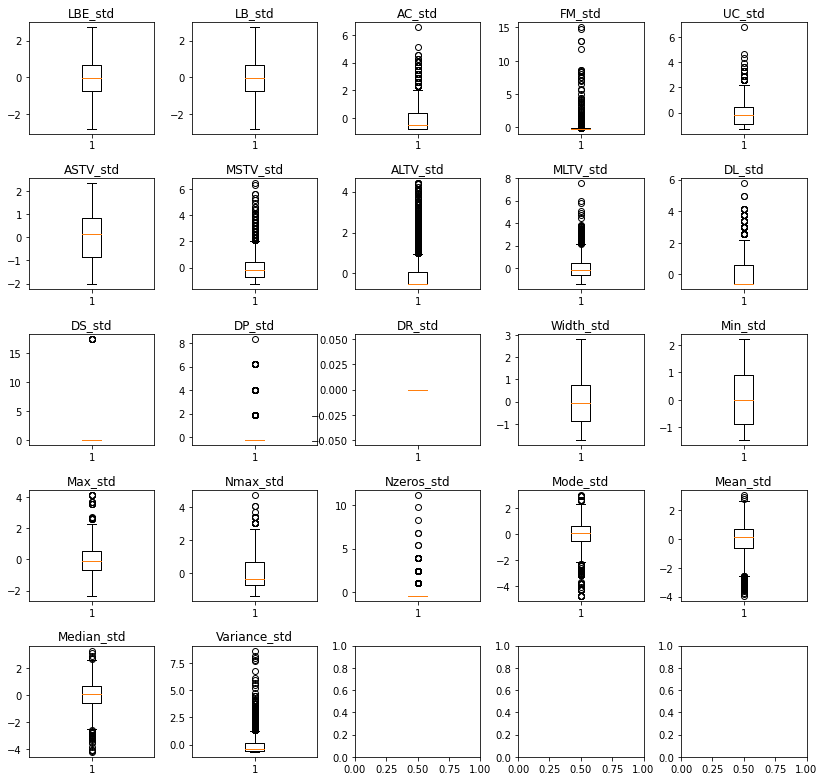

In [88]:
# Check standardisation with boxplots
print(len(variables_std)) # How many boxplots we want to produce

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
n = 0

for i in np.arange(5):
    for j in np.arange(5):
        if (i == 4) & (j > 1):
            break
        else: 
            plotting_var = data[variables_std].columns.tolist()[n]
            axs[i, j].boxplot(data[plotting_var])
            axs[i, j].set_title(plotting_var)
            #print(i, j, n)
            n += 1

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

### 1.8 - Saving the preprocessed dataset to file

In [89]:
data.to_csv("../Data/ctg_pp.csv", index = False)